<img src="../images/QISKit-c.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left">

## _*Visualizing a Quantum State*_ 

For more information about how to use the IBM Q experience (QX), consult the [tutorials](https://quantumexperience.ng.bluemix.net/qstage/#/tutorial?sectionId=c59b3710b928891a1420190148a72cce&pageIndex=0), or check out the [community](https://quantumexperience.ng.bluemix.net/qstage/#/community).

***
### Contributors
Jay Gambetta, Andrew Cross

In [1]:
# Checking the version of PYTHON; we only support 3 at the moment
import sys
if sys.version_info < (3,0):
    raise Exception("Please use Python version 3 or greater.")
    
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import linalg as la

import sys
sys.path.append("../../")
# importing the QISKit
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig

# import basic plot tools
from qiskit.basicplotter import plot_histogram

In [2]:
# import state tomography functions
from tools.tomography import plot_state, plot_bloch_vector
from tools.pauli import pauli_singles

### Single qubit states

Later we go in

In [ ]:
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config["url"]) # set the APIToken and API url

In [ ]:
n = 2 
# Creating registers
q2 = Q_program.create_quantum_registers("q2", n)
c2 = Q_program.create_classical_registers("c2", n)

# quantum circuit to make an entangled bell state 
bell = Q_program.create_circuit("bell", ["q2"], ["c2"])
bell.h(q2[0])

### Single qubit states

As mentioned later a quantum state for a single qubit is represented by the vector.

$$|\psi\rangle =  \alpha |0\rangle + \beta |1\rangle$$. 

Here for simplicity we we only consider the superposition states 

$$|\psi\rangle =  \frac{|0\rangle + \exp(i\lambda) |1\rangle}{\sqrt{2}}$$ which are generated from the circuit

* prepare $|0\rangle$ state
* apply $H$ gate
* apply $u1(\lambda)$

In [23]:
n = 1
q = Q_program.create_quantum_registers("q", n)
c = Q_program.create_classical_registers("c", n)

# quantum circuit to make an entangled bell state 
i =0

circuits = ["superposition" + str(i)]
superposition = Q_program.create_circuit(circuits[i], ["q"], ["c"])
superposition.h(q[0])
                                        
superposition.u1(2*i*np.pi/100, q[0])

device = 'local_unitary_simulator' # the device to run on
Q_program.execute(circuits, device, 1)



>> quantum_registers created: q 1
>> classical_registers created: c 1


{'result': 'all done', 'status': 'COMPLETED'}

## Two qubits states 

In [4]:
n = 2 
# Creating registers
q2 = Q_program.create_quantum_registers("q2", n)
c2 = Q_program.create_classical_registers("c2", n)

# quantum circuit to make an entangled bell state 
bell = Q_program.create_circuit("bell", ["q2"], ["c2"])
bell.h(q2[0])
bell.z(q2[0])
bell.cx(q2[0], q2[1])

# quantum circuit to make an superposition state 
superposition = Q_program.create_circuit("superposition", ["q2"], ["c2"])
superposition.h(q2)
superposition.t(q2[0])
superposition.s(q2[1])

>> quantum_registers created: q2 2
>> classical_registers created: c2 2


In [5]:
device = 'local_unitary_simulator' # the device to run on
Q_program.execute(["superposition", "bell"], device, 1)

ground = np.zeros(2**n)
ground[0]=1.0

state_superposition = np.dot(Q_program.get_data("superposition")['unitary'],ground)
rho_superposition=np.outer(state_superposition, state_superposition.conj())
bloch_superposition = list(map(lambda x: np.real(np.trace(np.dot(x.to_matrix(), rho_superposition))), pauli_singles(n)))

state_bell = np.dot(Q_program.get_data("bell")['unitary'],ground)
rho_bell=np.outer(state_bell, state_bell.conj())
bloch_bell = list(map(lambda x: np.real(np.trace(np.dot(x.to_matrix(), rho_bell))), pauli_singles(n)))

In [6]:
w, v = la.eigh(rho_superposition, eigvals=(2**n-1, 2**n-1))
(np.angle(v) -np.angle(v[0])) % 2*np.pi

array([[ 0.        ],
       [ 1.57774822],
       [ 4.04514932],
       [ 0.22936511]])

[ 1.]


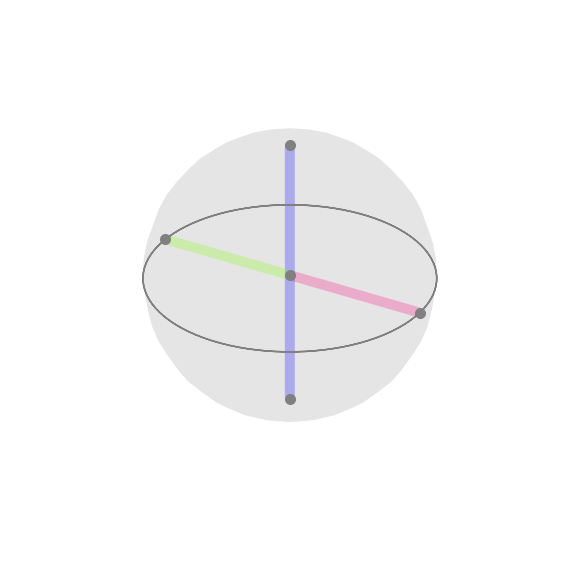

In [7]:
plot_state(rho_superposition,n,"qsphere")

[ 1.]


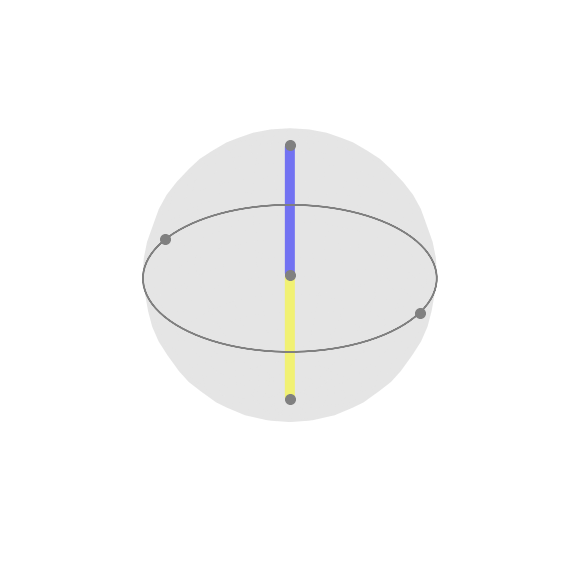

In [8]:
plot_state(rho_bell,n,"qsphere")

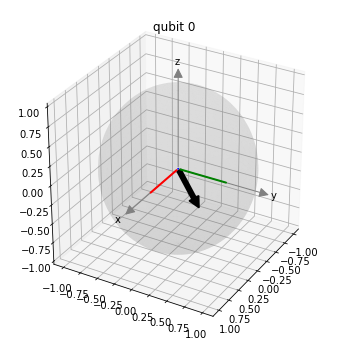

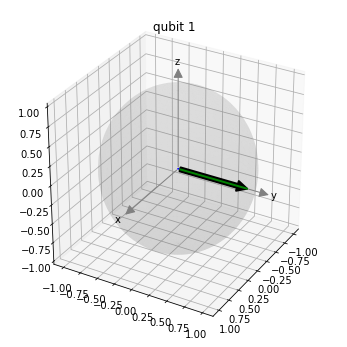

/Users/jmgambet/anaconda/envs/QISKitenv/lib/python3.6/site-packages/matplotlib/patches.py:3146: RuntimeWarning: divide by zero encountered in double_scalars
  ff = d / (dx * dx + dy * dy) ** .5
/Users/jmgambet/anaconda/envs/QISKitenv/lib/python3.6/site-packages/matplotlib/patches.py:3147: RuntimeWarning: invalid value encountered in double_scalars
  x2, y2 = x0 - ff * dx, y0 - ff * dy


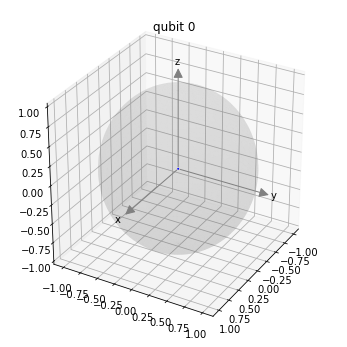

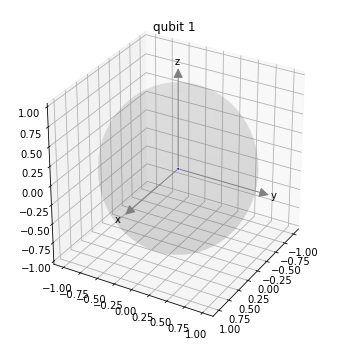

In [9]:
plot_bloch_vector(bloch_superposition,n)
plot_bloch_vector(bloch_bell,n)

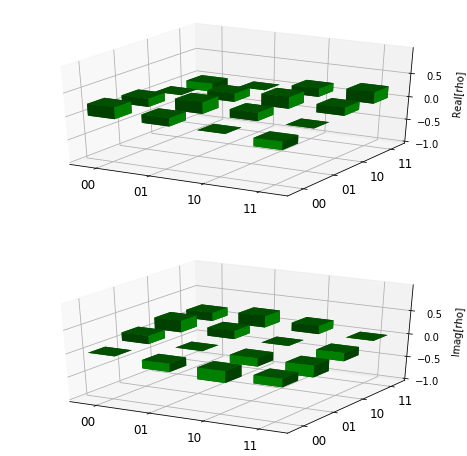

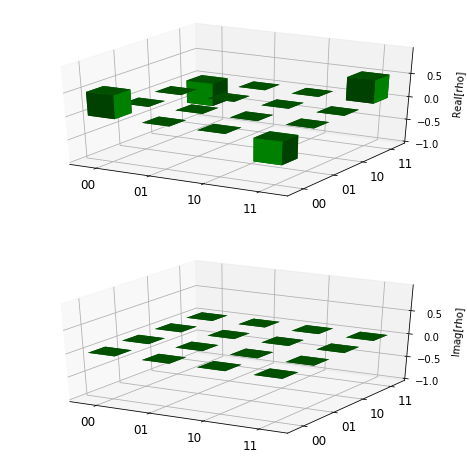

In [10]:
plot_state(rho_superposition,n,"city")
plot_state(rho_bell,n,"city")

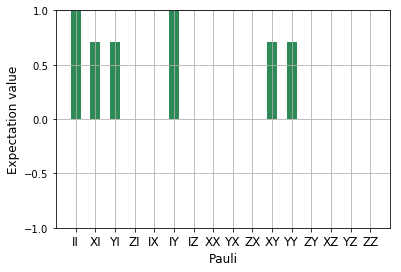

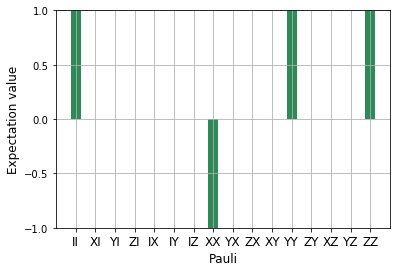

In [11]:
plot_state(rho_superposition,n,"paulivec")
plot_state(rho_bell,n,"paulivec")

## three qubits states 

In [12]:
n = 3
# Creating registers
q2 = Q_program.create_quantum_registers("q2", n)
c2 = Q_program.create_classical_registers("c2", n)

# quantum circuit to make an entangled bell state 
bell = Q_program.create_circuit("bell", ["q2"], ["c2"])
bell.h(q2[0])
bell.z(q2[0])
bell.cx(q2[0], q2[1])
bell.cx(q2[0], q2[2])

# quantum circuit to make an superposition state 
superposition = Q_program.create_circuit("superposition", ["q2"], ["c2"])
superposition.h(q2)
superposition.t(q2[0])
superposition.s(q2[1])
superposition.s(q2[2])
superposition.t(q2[2])

>> quantum_registers created: q2 3
>> classical_registers created: c2 3


In [13]:
device = 'local_qasm_simulator' # the device to run on
Q_program.execute(["superposition", "bell"], device, 1)

state_superposition = Q_program.get_data("superposition")["quantum_state"]
rho_superposition=np.outer(state_superposition, state_superposition.conj())
bloch_superposition = list(map(lambda x: np.real(np.trace(np.dot(x.to_matrix(), rho_superposition))), pauli_singles(n)))

state_bell = Q_program.get_data("bell")["quantum_state"]
rho_bell=np.outer(state_bell, state_bell.conj())
bloch_bell = list(map(lambda x: np.real(np.trace(np.dot(x.to_matrix(), rho_bell))), pauli_singles(n)))

[ 1.]


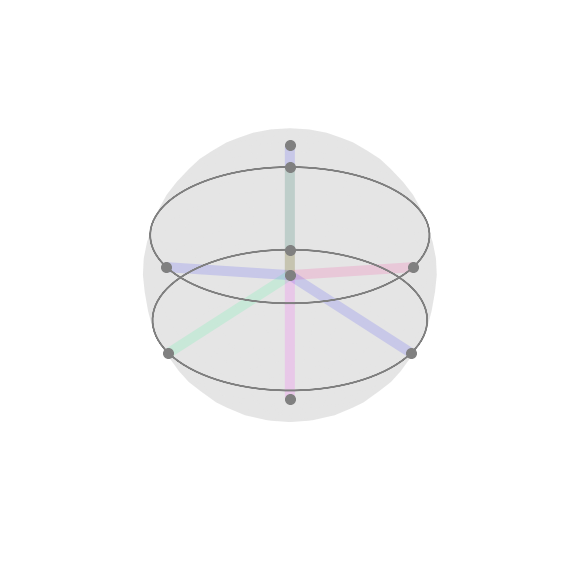

[ 1.]


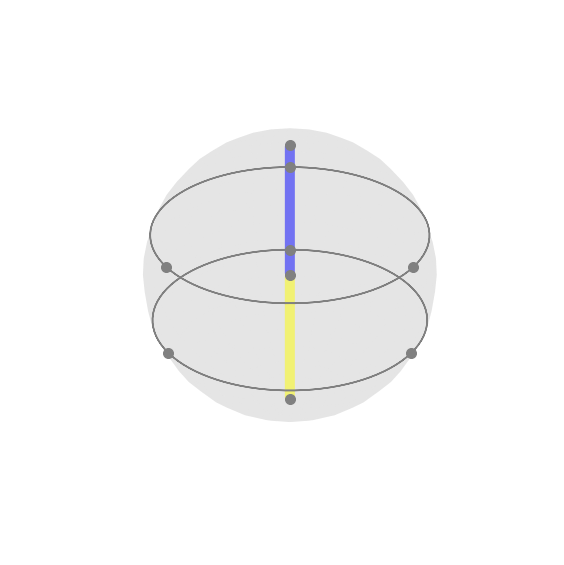

In [14]:
plot_state(rho_superposition,n,"qsphere")
plot_state(rho_bell,n,"qsphere")

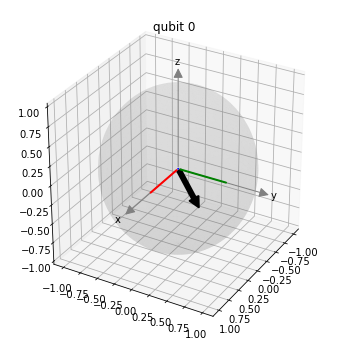

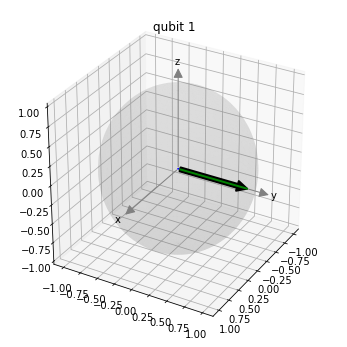

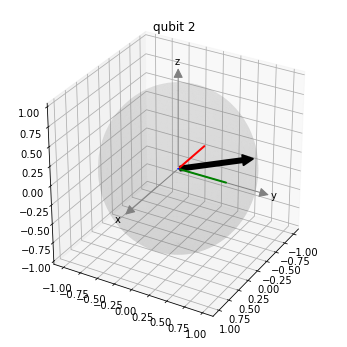

/Users/jmgambet/anaconda/envs/QISKitenv/lib/python3.6/site-packages/matplotlib/patches.py:3146: RuntimeWarning: divide by zero encountered in double_scalars
  ff = d / (dx * dx + dy * dy) ** .5
/Users/jmgambet/anaconda/envs/QISKitenv/lib/python3.6/site-packages/matplotlib/patches.py:3147: RuntimeWarning: invalid value encountered in double_scalars
  x2, y2 = x0 - ff * dx, y0 - ff * dy


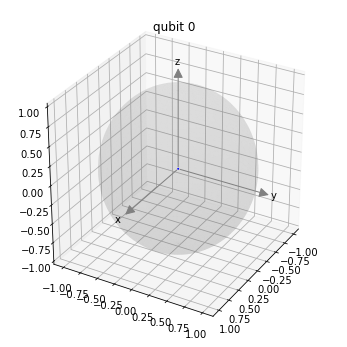

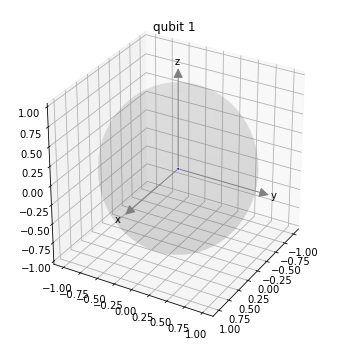

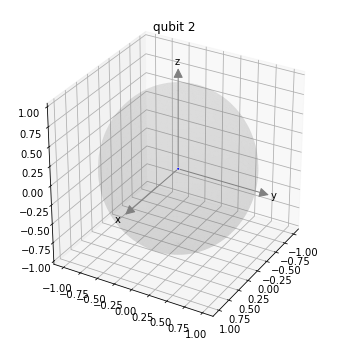

In [15]:
plot_bloch_vector(bloch_superposition,n)
plot_bloch_vector(bloch_bell,n)

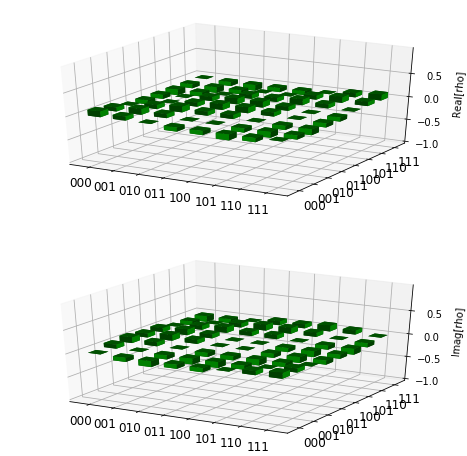

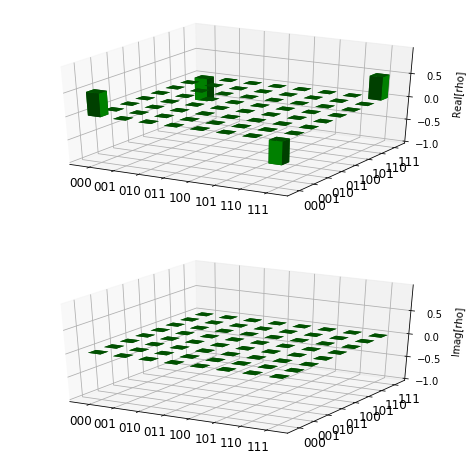

In [16]:
plot_state(rho_superposition,n,"city")
plot_state(rho_bell,n,"city")

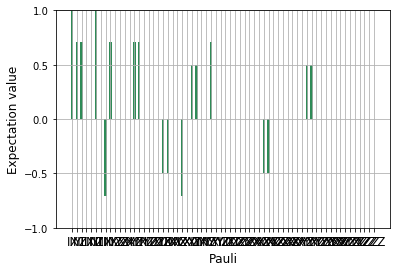

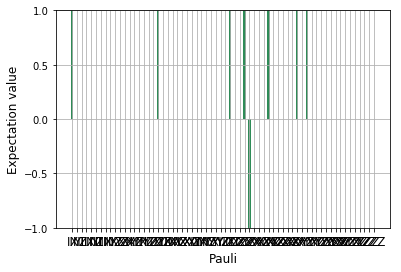

In [17]:
plot_state(rho_superposition,n,"paulivec")
plot_state(rho_bell,n,"paulivec")